In [28]:
#pandas and NumPy imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [29]:
# For reading stock data from yahoo
from pandas_datareader import data, wb

In [30]:
# For time stamps
from datetime import datetime

# For division in Python 3
from __future__ import division

In [31]:
# The tech stocks we'll use for this analysis
tech_list = ['TATAMOTORS.BO','FB','GOOG']

# Set up End and Start times for data grab

start = datetime(2018, 1, 1)
end = datetime.today()

#For loop for grabing yahoo finance data and setting as a dataframe
from pandas_datareader.data import DataReader
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)


In [32]:
# Summary Stats for Google stocks
GOOG.describe()

,High,Low,Open,Close,Volume,Adj Close
count,213.000000,213.000000,213.000000,213.000000,2.130000e+02,213.000000
mean,1137.002630,1113.375573,1125.293096,1125.149758,1.706242e+06,1125.149758
std,62.814298,66.905009,65.301507,65.265630,7.242603e+05,65.265630
min,1020.989990,980.640015,993.409973,1001.520020,6.790000e+05,1001.520020
25%,1088.000000,1064.339966,1077.310059,1078.589966,1.251900e+06,1078.589966
50%,1132.170044,1112.150024,1122.329956,1121.760010,1.494000e+06,1121.760010
75%,1179.859985,1161.050049,1174.849976,1172.530029,1.938700e+06,1172.530029
max,1273.890015,1249.020020,1271.000000,1268.329956,4.857900e+06,1268.329956


In [33]:
# General Info about Google Stock
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 213 entries, 2018-01-02 to 2018-11-02
Data columns (total 6 columns):
High         213 non-null float64
Low          213 non-null float64
Open         213 non-null float64
Close        213 non-null float64
Volume       213 non-null int64
Adj Close    213 non-null float64
dtypes: float64(5), int64(1)
memory usage: 11.6 KB


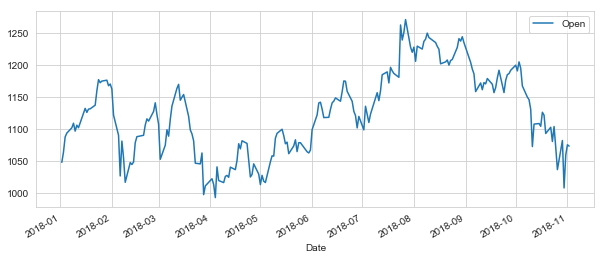

In [34]:
# Historical view of the total Opening of Google stock traded each day
GOOG['Open'].plot(legend=True,figsize=(10,4))

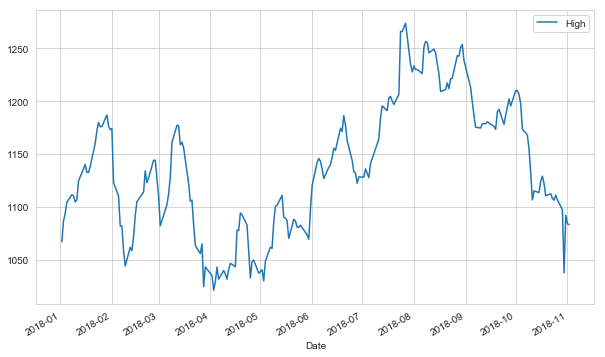

In [35]:
# Historical view of the High price of Google stock
GOOG['High'].plot(legend=True,figsize=(10,6))

In [36]:
# Calculation of moving averages for 7, 30 and 365 days of Google stocks
ma_day = [7,30,365]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    GOOG[column_name]=GOOG['High'].rolling(ma).mean()

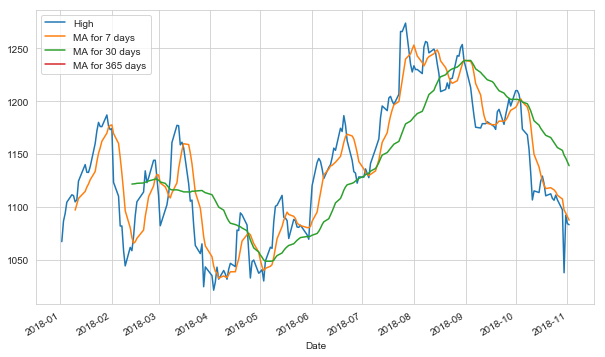

In [37]:
# Hostorical view of the moving averages of Closing Price of Google Stock
GOOG[['High','MA for 7 days','MA for 30 days','MA for 365 days']].plot(subplots=False,figsize=(10,6))

In [38]:
#Calculation to find he percent change for each day of Google stock
GOOG['Daily Return'] = GOOG['High'].pct_change()

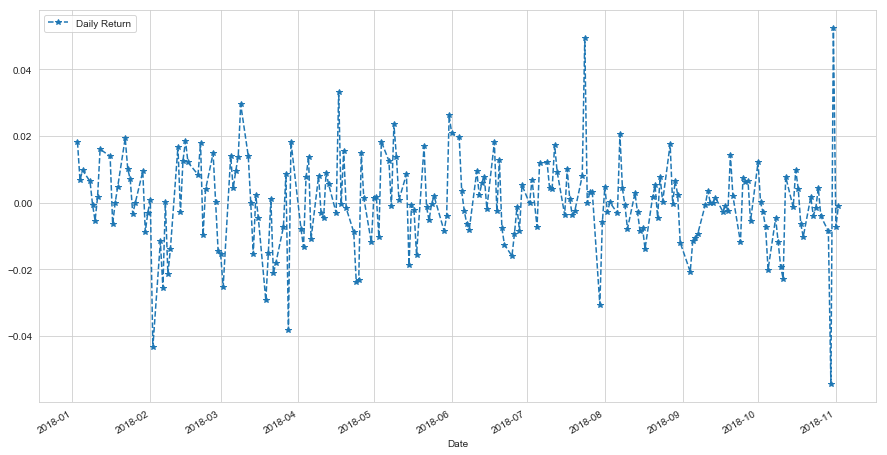

In [39]:
# Visualization of the percent change for each day of Google stock
GOOG['Daily Return'].plot(figsize=(15,8),legend=True,linestyle='--',marker='*')

C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


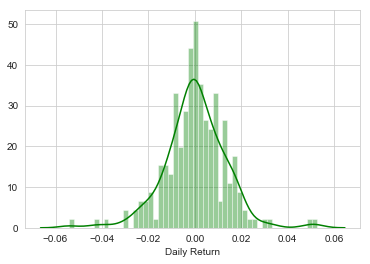

In [40]:
# Histogram to visualiza the average daily return of Google stock
sns.distplot(GOOG['Daily Return'].dropna(),bins=50,color='green')

In [41]:
# Calculation to grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(['TATAMOTORS.BO','FB','GOOG'],'yahoo',start,end)['High']

In [42]:
# Quick look of the data frame
closing_df.head()

Symbols,FB,GOOG,TATAMOTORS.BO
Date,,,
2018-01-01,NaN,NaN,436.450012
2018-01-02,181.580002,1066.939941,440.200012
2018-01-03,184.779999,1086.290039,441.450012
2018-01-04,186.210007,1093.569946,433.000000
2018-01-05,186.899994,1104.250000,436.299988


In [43]:
# Calculate the daily return percent of all stocks and store them in a new tech returns DataFrame
tech_rets = closing_df.pct_change()

C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


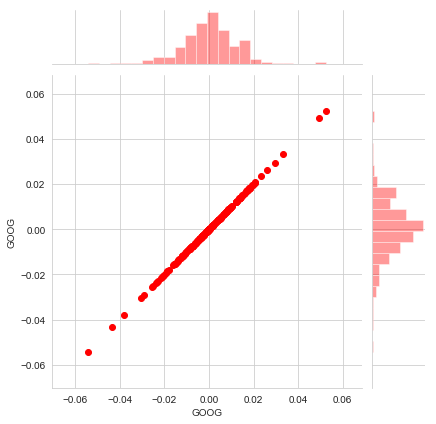

In [44]:
# Comparing Google to itself shows a perfectly linear relationship
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='red')

C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


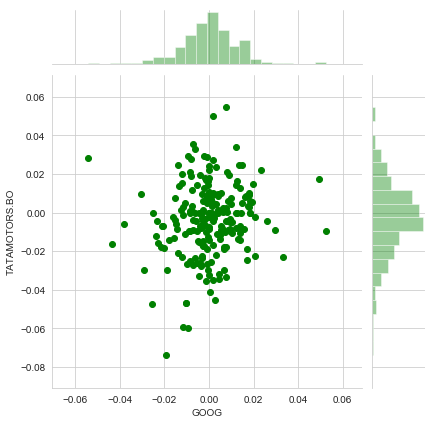

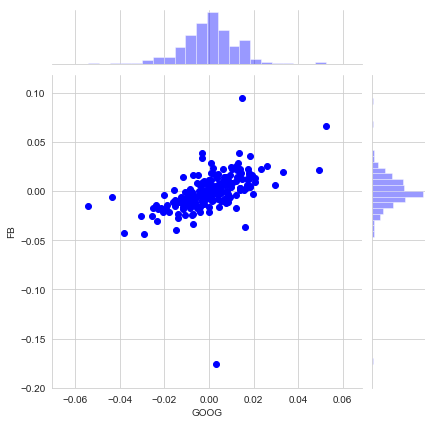

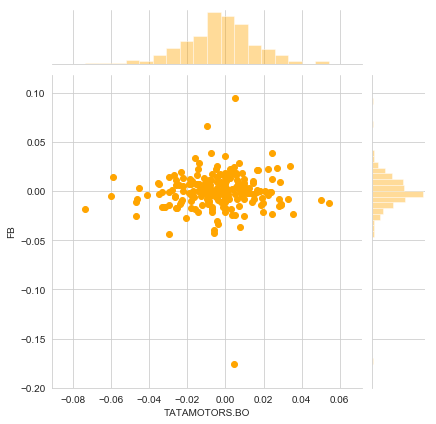

In [45]:
#Joinplot to compare the daily returns of Google and Tata Motors Bombay
sns.jointplot('GOOG','TATAMOTORS.BO',tech_rets,kind='scatter',color='green') # Google and Tata Motors Bombay
sns.jointplot('GOOG','FB',tech_rets,kind='scatter',color='blue') # Google and Facebook
sns.jointplot('TATAMOTORS.BO','FB',tech_rets,kind='scatter',color='orange') # Tata Motors Bombay and Facebook

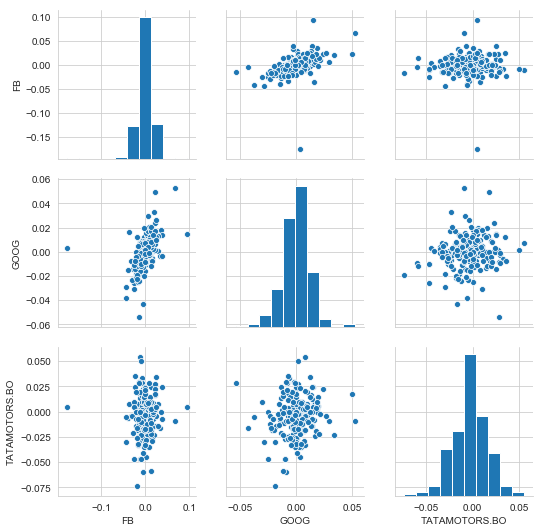

In [46]:
# Correlation analysis for every possible combination of stocks in our technology stock ticker list.
sns.pairplot(tech_rets.dropna())

C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


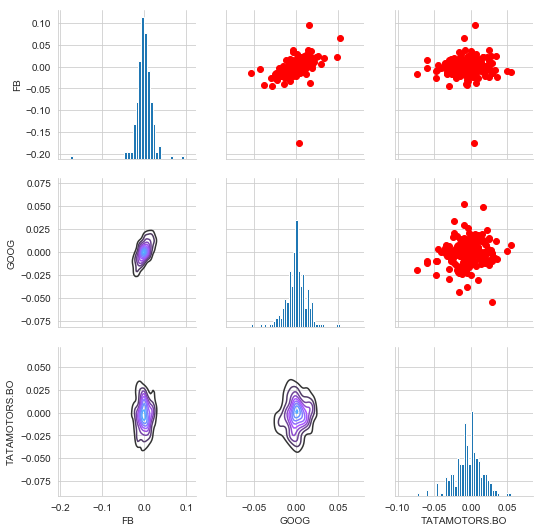

In [47]:
# Mixed plot to visualize the correlation between all technology stocks
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='red')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=40)

C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\DELL\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
C:\Users\DELL\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\contour.py:1540: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\contour.py:1541: 

ValueError: max must be larger than min in range parameter.

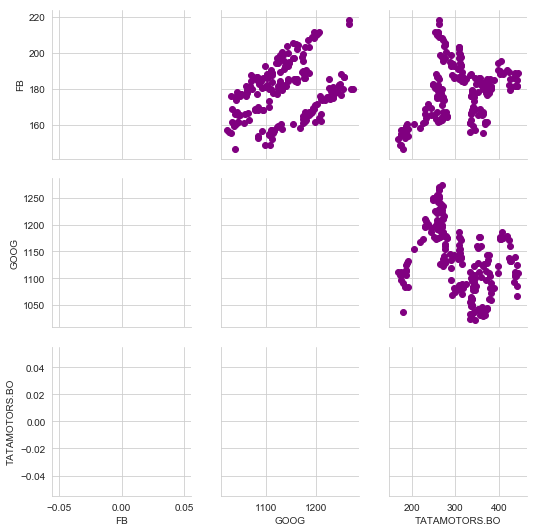

In [48]:
# Correlation analysis by using mixed types of plots for the high price of all technology stocks
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=40)

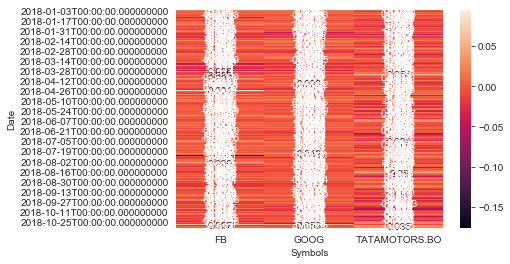

In [49]:
# Correlation plot for the daily returns of all stocks

sns.heatmap(tech_rets.dropna(),annot=True)

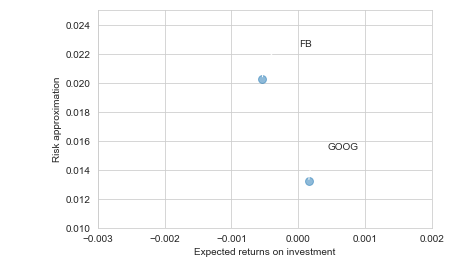

In [50]:
# Cleaning data frame by droping rows having null values
rets = tech_rets.dropna()

# Scatter plot of expected return of the stocks vs. their standard deviations of daily retunrs
area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.002])

plt.xlabel('Expected returns on investment')
plt.ylabel('Risk approximation')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 30),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0.5'))